In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_stations = pd.read_csv('Air_quality_data/Stazioni_qualit__dell_aria_20240430.csv')
df_air_quality1 = pd.read_csv('Air_quality_data/Dati_sensori_aria_2010-2017_20240430.csv', low_memory=False)
df_air_quality2 = pd.read_csv('Air_quality_data/Dati_sensori_aria_dal_2018_20240430.csv', low_memory=False)

In [3]:
# Add the two dataframes together by row
df_air_quality = pd.concat([df_air_quality1, df_air_quality2], axis=0)

In [4]:
milan_municipalities = [
    'Abbiategrasso', 'Albairate', 'Arconate', 'Arese', 'Arluno', 'Assago',
    'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo',
    'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', 'Cassano d\'Adda', 'Cassina de\' Pecchi', 'Cassinetta di Lugagnano', 'Castano Primo', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cinisello Balsamo', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cormano', 'Cornaredo', 'Corsico', 'Cuggiono', 'Cusago', 'Cusano Milanino',
    'Dairago', 'Dresano',
    'Gaggiano', 'Garbagnate Milanese', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti',
    'Inveruno', 'Inzago',
    'Lacchiarella', 'Lainate', 'Legnano', 'Liscate', 'Locate di Triulzi',
    'Magenta', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melegnano', 'Melzo', 'Mesero', 'Milano', 'Morimondo', 'Motta Visconti',
    'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio',
    'Opera', 'Ossona', 'Ozzero',
    'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Pero', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuele', 'Pioltello', 'Pogliano Milanese', 'Pozzo D\'Adda', 'Pozzuolo Martesana', 'Pregnana Milanese',
    'Rescaldina', 'Rho', 'Robecchetto con Induno', 'Robecco sul Naviglio', 'Rodano', 'Rosate', 'Rozzano',
    'San Colombano al Lambro', 'San Donato Milanese', 'San Giorgio su Legnano', 'San Giuliano Milanese', 'San Vittore Olona', 'San Zenone al Lambro', 'Santo Stefano Ticino', 'Sedriano', 'Segrate', 'Senago', 'Sesto San Giovanni', 'Settala', 'Settimo Milanese', 'Solaro',
    'Trezzano Rosa', 'Trezzano sul Naviglio', 'Trezzo sull\'Adda', 'Tribiano', 'Truccazzano', 'Turbigo',
    'Vanzaghello', 'Vanzago', 'Vaprio d\'Adda', 'Vermezzo con Zelo', 'Vernate', 'Vignate', 'Villa Cortese', 'Vimodrone', 'Vittuone', 'Vizzolo Predabissi',
    'Zibido San Giacomo'
]

In [5]:
## Print the number of municipalities in Milan
print(len(milan_municipalities))

133


In [6]:
## Make a list of municipalities in Milan that are not in the dataset
not_in_dataset = [municipality for municipality in milan_municipalities if municipality not in df_stations['Comune'].unique()]
print(not_in_dataset)

['Albairate', 'Arluno', 'Assago', 'Baranzate', 'Bareggio', 'Basiano', 'Basiglio', 'Bellinzago Lombardo', 'Bernate Ticino', 'Besate', 'Binasco', 'Boffalora Sopra Ticino', 'Bollate', 'Bresso', 'Bubbiano', 'Buccinasco', 'Buscate', 'Bussero', 'Busto Garolfo', 'Calvignasco', 'Cambiago', 'Canegrate', 'Carpiano', 'Carugate', 'Casarile', 'Casorezzo', "Cassina de' Pecchi", 'Cassinetta di Lugagnano', 'Cernusco sul Naviglio', 'Cerro Maggiore', 'Cerro al Lambro', 'Cesano Boscone', 'Cesate', 'Cisliano', 'Cologno Monzese', 'Colturano', 'Corbetta', 'Cornaredo', 'Cusago', 'Cusano Milanino', 'Dairago', 'Dresano', 'Gaggiano', 'Gessate', 'Gorgonzola', 'Grezzago', 'Gudo Visconti', 'Inveruno', 'Liscate', 'Locate di Triulzi', 'Magnago', 'Marcallo con Casone', 'Masate', 'Mediglia', 'Melzo', 'Mesero', 'Morimondo', 'Nerviano', 'Nosate', 'Novate Milanese', 'Noviglio', 'Opera', 'Ossona', 'Ozzero', 'Paderno Dugnano', 'Pantigliate', 'Parabiago', 'Paullo', 'Peschiera Borromeo', 'Pessano con Bornago', 'Pieve Emanuel

In [7]:
## Drop rows with municipalities not in the list of milan_municipalities
df_milano_stations = df_stations[df_stations['Comune'].isin(milan_municipalities)]
print(df_milano_stations['Comune'].unique())

['Inzago' 'Pero' 'Sesto San Giovanni' 'Lacchiarella' 'Cormano' 'Corsico'
 'Milano' "Cassano d'Adda" 'Cuggiono' "Trezzo sull'Adda"
 'Cinisello Balsamo' 'Legnano' 'Motta Visconti' 'Magenta' 'Turbigo'
 'Robecchetto con Induno' 'Arconate' 'Settimo Milanese' 'Pioltello' 'Rho'
 'San Giuliano Milanese' 'Arese' 'Abbiategrasso' 'Melegnano' 'Lainate'
 'Garbagnate Milanese' 'Tribiano' 'Castano Primo' 'Truccazzano']


In [8]:
## Print the number of municipalities in province of Milan that have air quality data
print(len(df_milano_stations['Comune'].unique()))

29


In [9]:
## Count the number of rows for each unique value in 'NomeTipoSensore' column
print(df_milano_stations['NomeTipoSensore'].value_counts())

Ossidi di Azoto               38
Biossido di Azoto             38
Biossido di Zolfo             32
Monossido di Carbonio         26
Ozono                         17
Particolato Totale Sospeso    14
PM10 (SM2005)                 13
Benzene                        7
Particelle sospese PM2.5       6
BlackCarbon                    5
Ammoniaca                      4
Arsenico                       3
Piombo                         3
Nikel                          3
Benzo(a)pirene                 3
Cadmio                         3
Name: NomeTipoSensore, dtype: int64


In [10]:
## Get the list IdSensore for each unique value in 'NomeTipoSensore' column
idSensor_grouped_by_type = df_milano_stations.groupby('NomeTipoSensore')['IdSensore'].unique()
print(idSensor_grouped_by_type)

NomeTipoSensore
Ammoniaca                                          [20020, 20484, 10269, 20525]
Arsenico                                                  [12608, 12638, 12625]
Benzene                            [17127, 6057, 6037, 9998, 6062, 6059, 17126]
Benzo(a)pirene                                            [12641, 12611, 12629]
Biossido di Azoto             [5507, 5513, 5531, 5550, 5520, 5549, 5519, 554...
Biossido di Zolfo             [5620, 5621, 5618, 5617, 5627, 5643, 5642, 563...
BlackCarbon                                 [20455, 29001, 20004, 20465, 20005]
Cadmio                                                    [12626, 12609, 12639]
Monossido di Carbonio         [5814, 5820, 5819, 5835, 5831, 5813, 5834, 581...
Nikel                                                     [12624, 12637, 12607]
Ossidi di Azoto               [6342, 6318, 6338, 6350, 6360, 6346, 6276, 629...
Ozono                         [5712, 5714, 5710, 5713, 5724, 5725, 10350, 57...
PM10 (SM2005)           

In [11]:
## Print the number of rows in the air quality dataframe for each unique value in 'IdSensore' column
print(df_air_quality['idSensore'].value_counts())

6665     122511
5721     122428
5548     122419
6419     122390
5749     122381
          ...  
17083       248
6922        105
5769        105
6943          3
6942          3
Name: idSensore, Length: 924, dtype: int64


In [12]:
## Remove column 'idOperatore' from the air quality dataframe
df_air_quality = df_air_quality.drop('idOperatore', axis=1)
df_air_quality.head()

,idSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [13]:
## Rename the column 'idSensore' to 'IdSensore' in the air quality dataframe
df_air_quality = df_air_quality.rename(columns={'idSensore': 'IdSensore'})
df_air_quality.head()

,IdSensore,Data,Valore,Stato
0,5504,01/01/2010 01:00:00,70.7,VA
1,5504,01/01/2010 02:00:00,73.0,VA
2,5504,01/01/2010 03:00:00,69.0,VA
3,5504,01/01/2010 04:00:00,66.0,VA
4,5504,01/01/2010 05:00:00,68.8,VA


In [14]:
# Extract the month from the 'Data' column using string slicing and convert it to integer
df_air_quality['Day'] = df_air_quality['Data'].str[0:2].astype(int)
df_air_quality.head()

,IdSensore,Data,Valore,Stato,Day
0,5504,01/01/2010 01:00:00,70.7,VA,1
1,5504,01/01/2010 02:00:00,73.0,VA,1
2,5504,01/01/2010 03:00:00,69.0,VA,1
3,5504,01/01/2010 04:00:00,66.0,VA,1
4,5504,01/01/2010 05:00:00,68.8,VA,1


In [15]:
# Extract the month from the 'Data' column using string slicing and convert it to integer
df_air_quality['Month'] = df_air_quality['Data'].str[3:5].astype(int)
df_air_quality.head()

,IdSensore,Data,Valore,Stato,Day,Month
0,5504,01/01/2010 01:00:00,70.7,VA,1,1
1,5504,01/01/2010 02:00:00,73.0,VA,1,1
2,5504,01/01/2010 03:00:00,69.0,VA,1,1
3,5504,01/01/2010 04:00:00,66.0,VA,1,1
4,5504,01/01/2010 05:00:00,68.8,VA,1,1


In [16]:
# Extract the year from the 'Data' column using string slicing
df_air_quality['Year'] = df_air_quality['Data'].str[6:10].astype(int)
df_air_quality.head()

,IdSensore,Data,Valore,Stato,Day,Month,Year
0,5504,01/01/2010 01:00:00,70.7,VA,1,1,2010
1,5504,01/01/2010 02:00:00,73.0,VA,1,1,2010
2,5504,01/01/2010 03:00:00,69.0,VA,1,1,2010
3,5504,01/01/2010 04:00:00,66.0,VA,1,1,2010
4,5504,01/01/2010 05:00:00,68.8,VA,1,1,2010


In [17]:
## Append the column 'NomeTipoSensore' to the air quality dataframe based on the 'IdSensore' column
df_air_quality = df_air_quality.merge(df_milano_stations[['IdSensore', 'NomeTipoSensore']], on='IdSensore')
df_air_quality.head()

,IdSensore,Data,Valore,Stato,Day,Month,Year,NomeTipoSensore
0,5504,01/01/2010 01:00:00,70.7,VA,1,1,2010,Biossido di Azoto
1,5504,01/01/2010 02:00:00,73.0,VA,1,1,2010,Biossido di Azoto
2,5504,01/01/2010 03:00:00,69.0,VA,1,1,2010,Biossido di Azoto
3,5504,01/01/2010 04:00:00,66.0,VA,1,1,2010,Biossido di Azoto
4,5504,01/01/2010 05:00:00,68.8,VA,1,1,2010,Biossido di Azoto


In [18]:
## Remove in the column 'Data' string[0:11] from the air quality dataframe and rename the column to 'Time'
df_air_quality['Time'] = df_air_quality['Data'].str[11:]
df_air_quality = df_air_quality.drop('Data', axis=1)
df_air_quality.head()

,IdSensore,Valore,Stato,Day,Month,Year,NomeTipoSensore,Time
0,5504,70.7,VA,1,1,2010,Biossido di Azoto,01:00:00
1,5504,73.0,VA,1,1,2010,Biossido di Azoto,02:00:00
2,5504,69.0,VA,1,1,2010,Biossido di Azoto,03:00:00
3,5504,66.0,VA,1,1,2010,Biossido di Azoto,04:00:00
4,5504,68.8,VA,1,1,2010,Biossido di Azoto,05:00:00


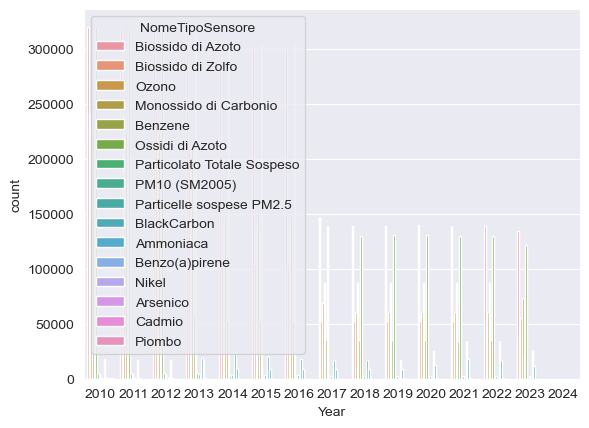

In [19]:
# Set the display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
## Plot number of rows for each unique value in 'NomeTipoSensore' column per year in the air quality dataframe
sns.countplot(x='Year', hue='NomeTipoSensore', data=df_air_quality)
plt.show()



In [20]:
# Group by 'Year' and 'idSensore', and count the number of rows
result = df_air_quality.groupby(['Year', 'IdSensore']).size()

# Now print the result
print(result)

Year  IdSensore
2010  5504         8757
      5505         8756
      5506         8664
      5507         8756
      5508         8654
      5511         8727
      5513         8007
      5514         8541
      5516         8687
      5517         8494
      5518         8738
      5519         8739
      5520         8756
      5528         8292
      5530         8747
      5531         8740
      5532         8678
      5534         8729
      5535         8756
      5538         8735
      5539         8747
      5540         8714
      5541         8758
      5542         8750
      5543         8502
      5547         8419
      5548         8754
      5549         8695
      5550         8724
      5551         8716
      5552         8532
      5554         8661
      5605         8565
      5609         8551
      5613         8746
      5614         8747
      5617         8727
      5618         8678
      5619         8419
      5620         8292
      5621         8756
